In [1]:
import pandas as pd
data = pd.read_csv("data/breast-cancer-wisconsin.csv", encoding='utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [7]:
data[['Class']].value_counts(sort=False)

Class
0        444
1        239
dtype: int64

In [8]:
print(data.shape)

(683, 11)


In [14]:
# 방법1: 특성이름으로 특성 데이터셋(X) 나누기
X1= data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
# 방법2: 특성 위치값으로 특성 데이터셋(X) 나누기
X2 = data[data.columns[1:10]]
# 방법3: loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야함)
X3 = data.loc[:, 'Clump_Thickness':'Mitoses']


In [15]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [106]:
y=data[['Class']]
# y1 = data['Class']
y1

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,  stratify=y,random_state=10)

In [31]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [34]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [36]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [40]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,2.775558e-17,-2.775558e-17,6.938894e-18,-6.938894e-18,-5.551115e-17,-6.245005e-17,2.775558e-17,2.775558e-17,-2.081668e-17
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.199548e+00,-7.032370e-01,-7.465086e-01,-6.291643e-01,-9.957651e-01,-6.878189e-01,-9.899171e-01,-6.116084e-01,-3.467249e-01
25%,-8.497934e-01,-7.032370e-01,-7.465086e-01,-6.291643e-01,-5.512736e-01,-6.878189e-01,-5.844471e-01,-6.116084e-01,-3.467249e-01
50%,-1.502850e-01,-7.032370e-01,-5.791651e-01,-6.291643e-01,-5.512736e-01,-6.878189e-01,-1.789770e-01,-6.116084e-01,-3.467249e-01
75%,5.492234e-01,6.036862e-01,5.922388e-01,8.589036e-02,3.377094e-01,4.409096e-01,2.264930e-01,4.077389e-02,-3.467249e-01
max,1.948240e+00,2.237340e+00,2.265673e+00,2.588582e+00,3.004658e+00,1.851820e+00,2.659313e+00,2.324112e+00,4.757774e+00


In [42]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.386615,0.238467,0.241066,0.226771,0.246264,0.318389,0.272904,0.205978,0.064327
std,0.300167,0.342080,0.332251,0.338813,0.237848,0.434689,0.266561,0.334784,0.181914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.444444,0.333333,0.833333,0.444444,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.017433,-0.002008,-0.020375,0.100526,-0.010606,0.120773,0.005974,-0.006915,-0.018365
std,0.944861,1.005912,1.000801,1.090213,0.951494,1.103954,0.972741,0.982832,0.928577
min,-1.199548,-0.703237,-0.746509,-0.629164,-0.995765,-0.687819,-0.989917,-0.611608,-0.346725
25%,-0.500039,-0.703237,-0.746509,-0.629164,-0.551274,-0.687819,-0.584447,-0.611608,-0.346725
50%,-0.150285,-0.703237,-0.746509,-0.629164,-0.551274,-0.687819,-0.178977,-0.611608,-0.346725
75%,0.549223,0.603686,0.592239,0.800945,0.337709,1.428547,0.631963,0.366965,-0.346725
max,1.948240,2.237340,2.265673,2.588582,3.004658,1.851820,2.659313,2.324112,4.757774


In [85]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
# 모델 훈련
model.fit(X_scaled_minmax_train, y_train)

D:\DEV\introduction_to_machine_learning_with_python\venv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [86]:
# 모델 예측(범주)
pred_train = model.predict(X_scaled_minmax_train)
# 모델 예측(확률)
# pred_train_proba = model.predict_proba(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.96875

In [87]:
pred_test= model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9707602339181286

In [88]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬: \n", confusion_train)

훈련데이터 오차행렬: 
 [[326   7]
 [  9 170]]


In [89]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 오차행렬: \n", confusion_test)

테스트 오차행렬: 
 [[108   3]
 [  2  58]]


In [90]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print('분류예측 레포트: \n', cfreport_train)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.96      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.96      0.97       512
weighted avg       0.97      0.97      0.97       512



In [91]:
cfreport_test = classification_report(y_test, pred_test)
print('분류예측 레포트: \n', cfreport_test)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.95      0.97      0.96        60

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [92]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9942942942942943

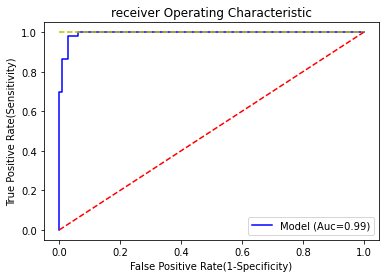

In [93]:
import matplotlib.pyplot as plt
plt.title("receiver Operating Characteristic")
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (Auc=%0.2f)'% roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc='lower right')
plt.show()

In [98]:
prob_train = model.predict_proba(X_scaled_minmax_train)
y_train['y_pred'] = pred_train

# y_train[['y_pred']] = pred_train
y_train[['y_prob0', 'y_prob1']]=prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
665,1,1,0.001324,0.998676
599,0,0,0.988700,0.011300
611,0,0,0.965467,0.034533
503,0,0,0.978617,0.021383
299,0,0,0.991880,0.008120
...,...,...,...,...
96,1,1,0.004071,0.995929
414,0,0,0.987492,0.012508
513,0,0,0.939101,0.060899
302,0,0,0.991484,0.008516


In [105]:
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test['y_pred']= pred_test
y_test[['y_prob0', 'y_prob1']]=prob_test
print(y_test)

     Class  y_pred   y_prob0   y_prob1
219      0       0  0.990571  0.009429
197      0       0  0.966459  0.033541
566      1       1  0.005319  0.994681
141      0       0  0.987492  0.012508
178      1       1  0.023536  0.976464
..     ...     ...       ...       ...
479      0       0  0.567071  0.432929
330      1       1  0.003679  0.996321
626      0       0  0.983424  0.016576
436      0       0  0.974972  0.025028
661      0       0  0.974972  0.025028

[171 rows x 4 columns]


In [109]:
Total_test = pd.concat([X_test,y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
219,1,1,1,1,2,1,2,1,1,0,0,0.990571,0.009429
197,5,1,1,1,2,1,3,1,1,0,0,0.966459,0.033541
566,5,7,10,6,5,10,7,5,1,1,1,0.005319,0.994681
141,2,1,1,1,2,1,2,1,1,0,0,0.987492,0.012508
178,8,7,6,4,4,10,5,1,1,1,1,0.023536,0.976464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,5,1,2,10,4,5,2,1,1,0,0,0.567071,0.432929
330,7,6,4,8,10,10,9,5,3,1,1,0.003679,0.996321
626,3,1,1,1,2,1,2,1,1,0,0,0.983424,0.016576
436,5,1,1,1,2,1,1,1,1,0,0,0.974972,0.025028


In [110]:
Total_test.to_csv('data/classification_test.csv')